<a href="https://colab.research.google.com/github/Sunita2644/ML-basics/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of car data.csv')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Dataset Information:
Car_name: Name of Car Company(categorical)

Year: Year in which car is  purchased

Selling_price: selling price of car(Numeric)

Present_Price: Price at Prsesnt(Numeric)

Kms_Driven: total kelometers driven(Numeric)

Fuel_Type: Car fuel type i.e gas or diesel (Categorical)

seller_Type: type of seller i.e owner or dealer(Categorical)

Transmission: trnsmission i.e manual or automatic(Categorical)

Owner: car is hold by dealer or owner(Integer)

In [ ]:
dataset.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [ ]:
#duplicate
len(dataset[dataset.duplicated()])

2

In [ ]:
dataset.drop_duplicates(subset=None, keep='first', inplace=False)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

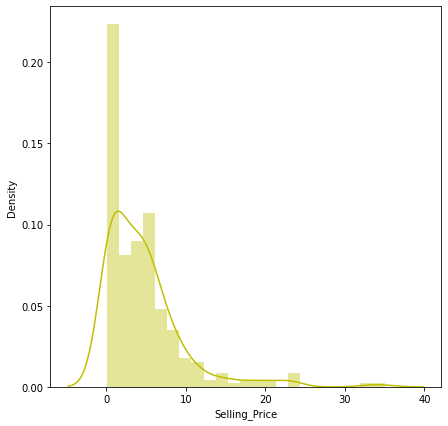

In [ ]:
#dependent variable 'selling_Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Selling_Price'],color="y")

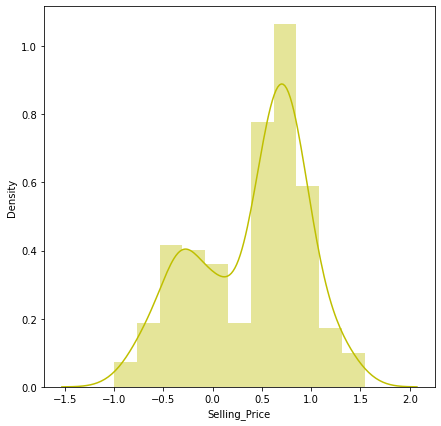

In [ ]:
# Dependent variable Selling Price
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['Selling_Price']),color="y")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

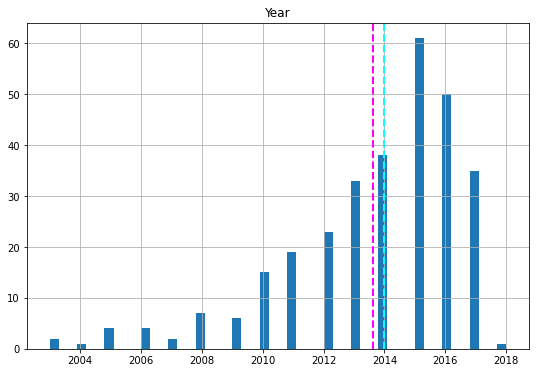

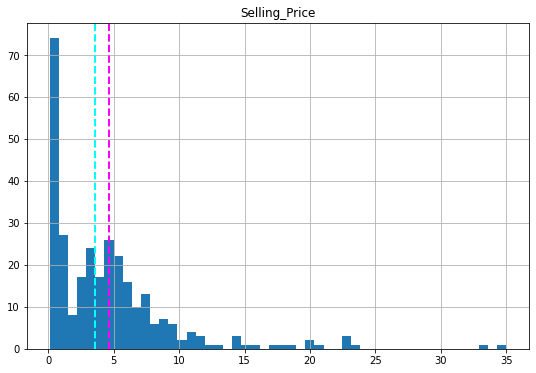

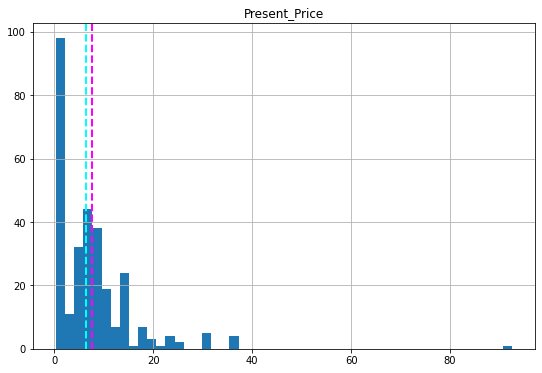

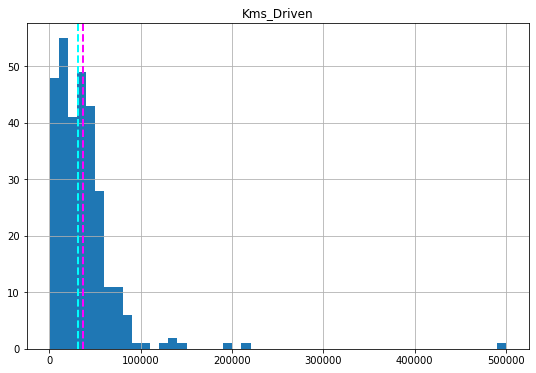

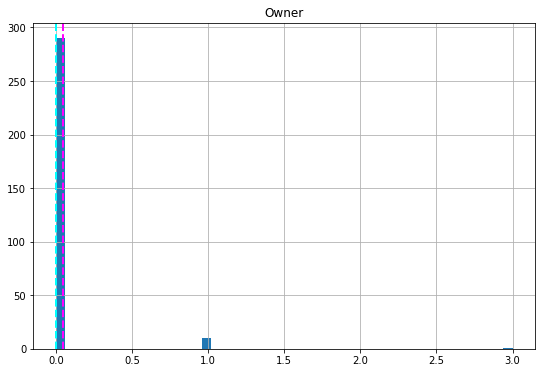

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count 

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
dataset.max()

Car_Name              xcent
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Kms_Driven           500000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     3
dtype: object

In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

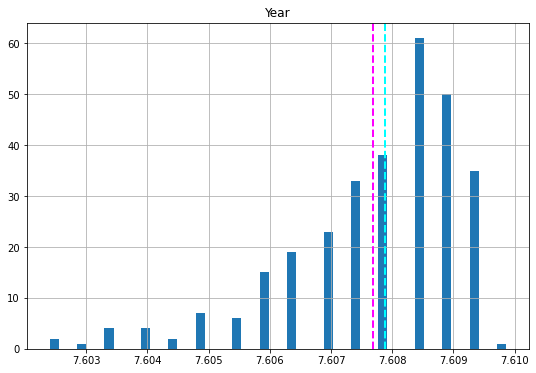

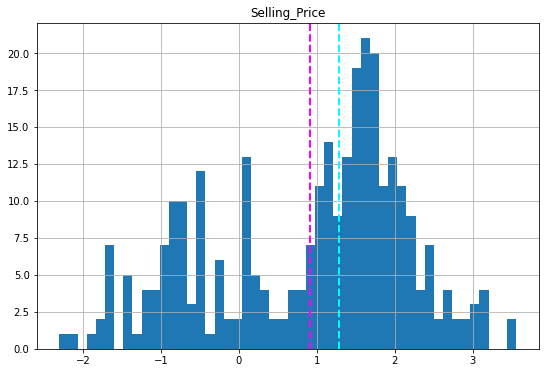

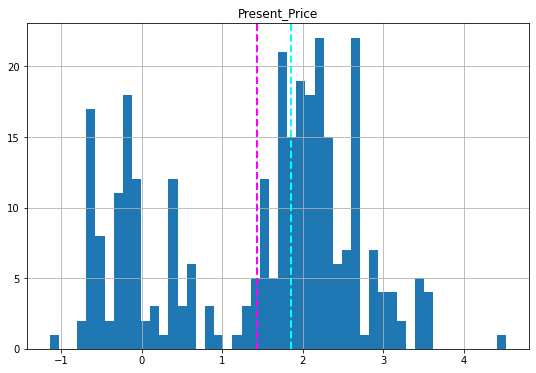

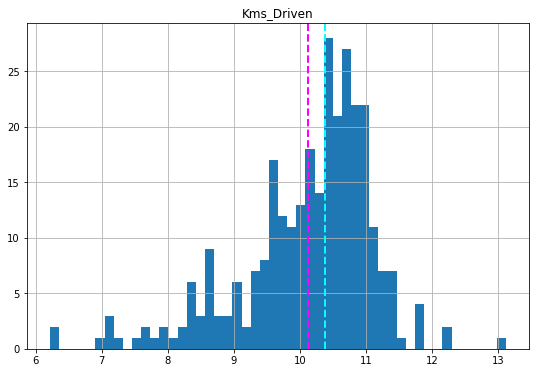

In [ ]:
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

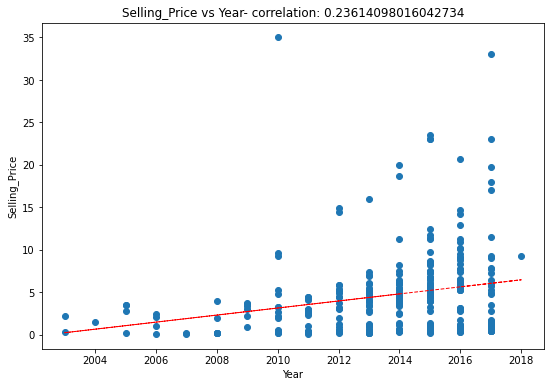

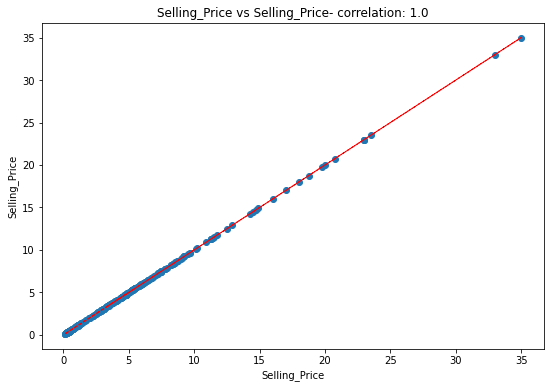

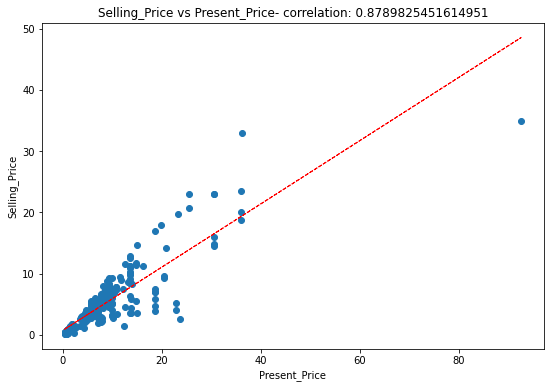

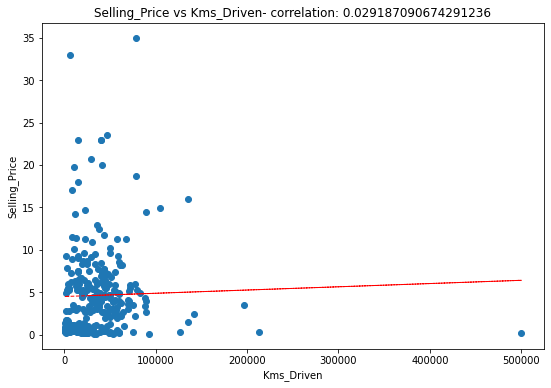

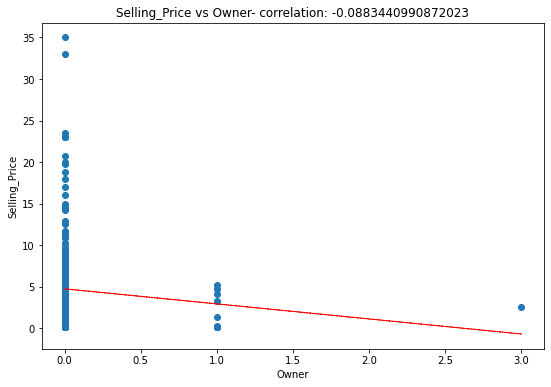

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Selling_Price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling_Price')
    ax.set_title('Selling_Price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Selling_Price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

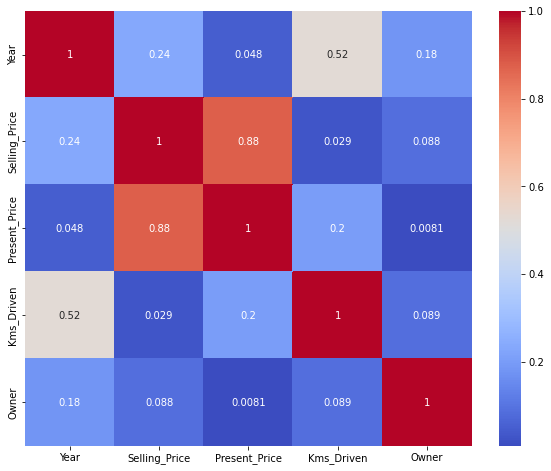

In [ ]:
## Correlation
plt.figure(figsize=(10,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Selling_Price']]])

,variables,VIF
0,Year,2.408884
1,Present_Price,1.858906
2,Kms_Driven,2.001950
3,Owner,1.038791


In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

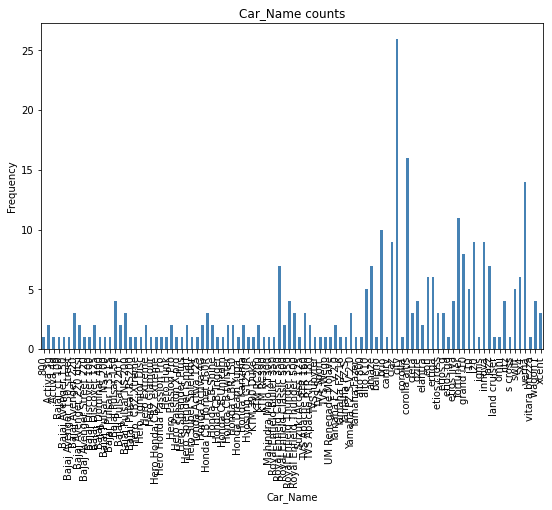

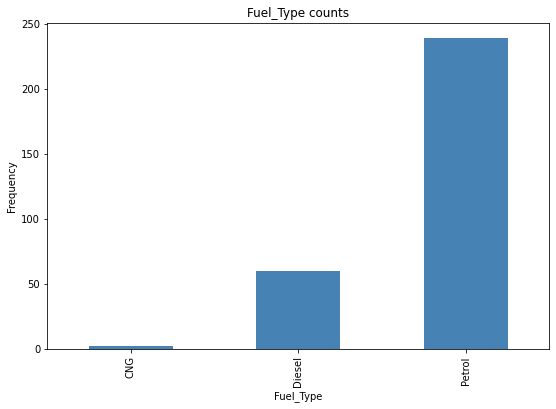

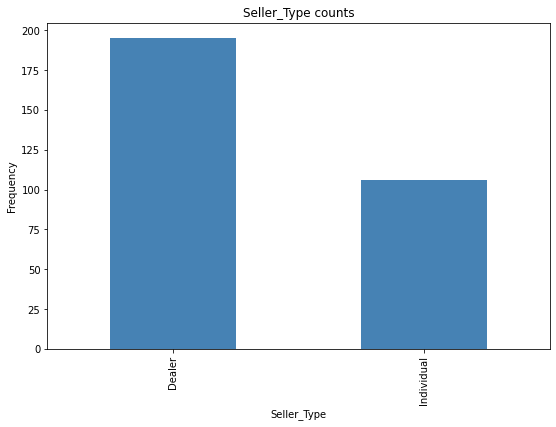

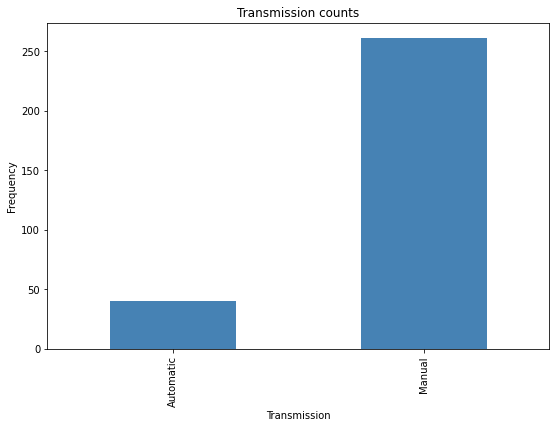

In [ ]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

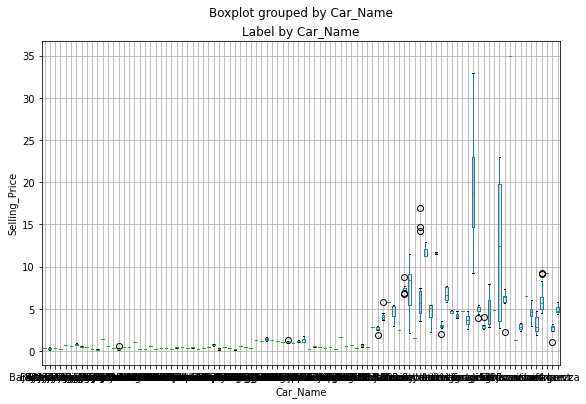

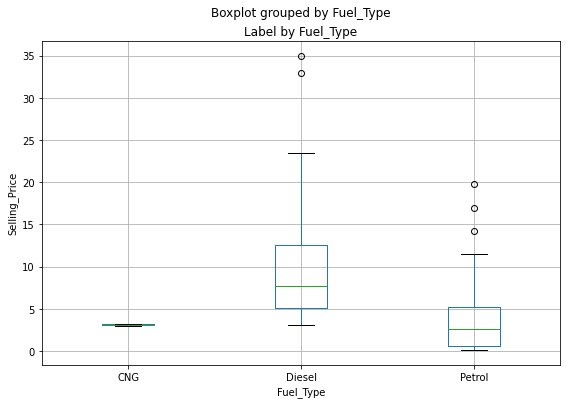

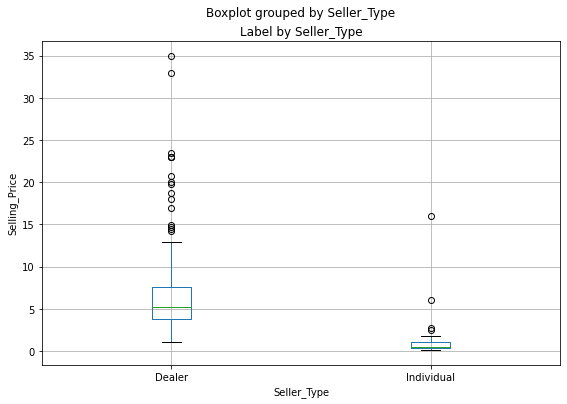

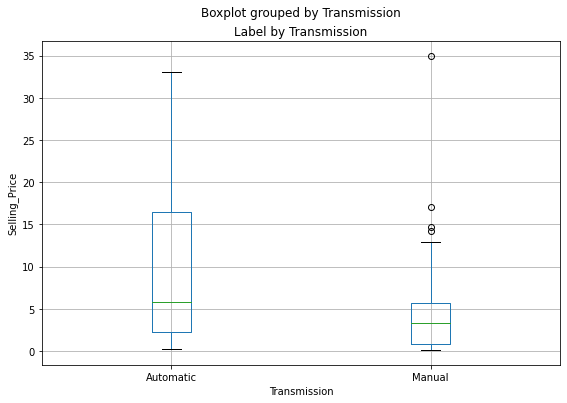

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Selling_Price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Selling_Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

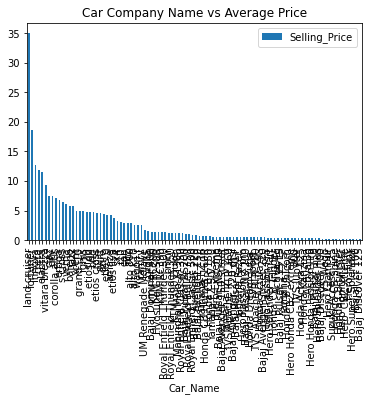

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['Car_Name'])['Selling_Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
dataset_pr=dataset.copy()

In [ ]:
df_autox.rename(columns={'Selling_Price':'price_mean'},inplace=True)

In [ ]:
dataset = dataset.merge(df_autox,on = 'Car_Name',how = 'left')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,price_mean
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.862500
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,3.158333
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7.472222
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2.512500
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4.540000


In [ ]:
dataset['Car_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 3 else (1 if 3 <= x < 5 else 2))

In [ ]:
dataset["Car_cat"].value_counts()

0    125
2    107
1     69
Name: Car_cat, dtype: int64

In [ ]:
correlation.Selling_Price

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [ ]:
dataset_pr=dataset.copy()

In [ ]:
dataset.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"Fuel_Type":{"Petrol":1,"Diesel":0,"CNG":0},
                 "Transmission":{"Manual":1,"Automatic":0},
                 "Seller_Type":{"Dealer":1,"Individual":0},
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [ ]:
dataset_pr.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,price_mean,Car_cat
0,ritz,2014,3.35,5.59,27000,1,1,1,0,2.862500,0
1,sx4,2013,4.75,9.54,43000,0,1,1,0,3.158333,1
2,ciaz,2017,7.25,9.85,6900,1,1,1,0,7.472222,2
3,wagon r,2011,2.85,4.15,5200,1,1,1,0,2.512500,0
4,swift,2014,4.60,6.87,42450,0,1,1,0,4.540000,1


In [ ]:
numeric_features

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
features=['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
new_numeric=['Fuel_Type','Seller_Type','Transmission','Car_cat']

In [ ]:
features=features+new_numeric

In [ ]:
features

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Car_cat']

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [ ]:
y = np.log10(dataset_pr['Selling_Price'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(240, 9)
(61, 9)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.9122637288261827

In [ ]:
reg.coef_

array([ 0.10326204,  0.11203614,  0.07049165, -0.00731291,  0.01601846,
       -0.01866706,  0.27078017,  0.01081569,  0.12911717])

In [ ]:
len(reg.coef_)

9

In [ ]:
reg.intercept_

0.39223490645073195

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 0.92437774, -0.35731291,  0.64126145,  1.01087799,  1.2727706 ,
        0.68835143,  0.50778919, -0.18087412,  0.52882271,  0.69287287,
        0.43329781, -0.17155126,  0.71366332,  0.84294644,  0.96392595,
        1.29361339,  0.86473594,  0.6002233 , -0.36331587, -0.10720588,
        0.46164753,  0.74574346,  0.71023178,  1.02182662, -0.48204254,
       -0.13620164, -0.37327842, -0.24692931, -0.32152079,  0.5735112 ,
        0.53175351,  0.87202865, -0.25003118,  0.97476582,  0.55103921,
       -0.15910933,  0.87222227,  0.69105605, -0.40981371,  0.92587657,
        1.06845445,  1.33674393,  0.65058358,  0.70451576,  0.67261765,
        1.10191646, -0.29671683, -0.16350421,  0.74586993,  0.88455195,
        0.82432911,  0.46965513,  0.73072019,  1.44888161, -0.15975722,
       -0.19948819, -0.28466119,  0.42210181,  0.54108345, -0.14705617,
        0.44841404])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.8095752735604572
RMSE : 0.8997640099273015


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9679722644904106
Adjusted R2 :  0.962320311165189


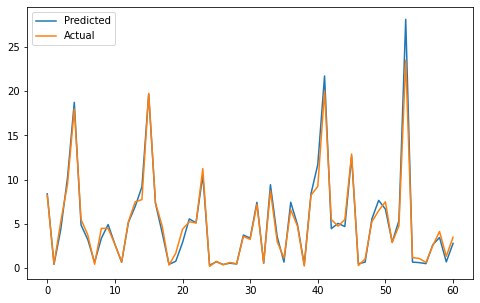

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()